In [149]:
#Data manipulation
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
#For Stats stuff
import numpy as np
from scipy import stats
from scipy.stats import norm
from scipy.stats import boxcox

#ML stuff
from sklearn.model_selection import train_test_split, cross_val_score, learning_curve, validation_curve
from sklearn.preprocessing import StandardScaler, MinMaxScaler, PolynomialFeatures
from sklearn.linear_model import LogisticRegression
# Select features using chi-squared test
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
#Deep Learning Stuff


import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [150]:
parkinsons_df = pd.read_csv(r"C:\Users\paraicoreilly\Desktop\ML Projects\parkinsons\parkinsons.data")
print('First rows of data:\n')
print(parkinsons_df.head())
print('Data description:\n')
print(parkinsons_df.describe())
print('Breakdown of data types:\n')
parkinsons_df.dtypes
print('Shape of Data:\n')
print(parkinsons_df.shape)

First rows of data:

             name  MDVP:Fo(Hz)  MDVP:Fhi(Hz)  MDVP:Flo(Hz)  MDVP:Jitter(%)  \
0  phon_R01_S01_1      119.992       157.302        74.997         0.00784   
1  phon_R01_S01_2      122.400       148.650       113.819         0.00968   
2  phon_R01_S01_3      116.682       131.111       111.555         0.01050   
3  phon_R01_S01_4      116.676       137.871       111.366         0.00997   
4  phon_R01_S01_5      116.014       141.781       110.655         0.01284   

   MDVP:Jitter(Abs)  MDVP:RAP  MDVP:PPQ  Jitter:DDP  MDVP:Shimmer  ...  \
0           0.00007   0.00370   0.00554     0.01109       0.04374  ...   
1           0.00008   0.00465   0.00696     0.01394       0.06134  ...   
2           0.00009   0.00544   0.00781     0.01633       0.05233  ...   
3           0.00009   0.00502   0.00698     0.01505       0.05492  ...   
4           0.00011   0.00655   0.00908     0.01966       0.06425  ...   

   Shimmer:DDA      NHR     HNR  status      RPDE       DFA   spr

In [151]:
# ~ we don't name - drop it
parkinsons_df.drop('name',axis=1,inplace = True)

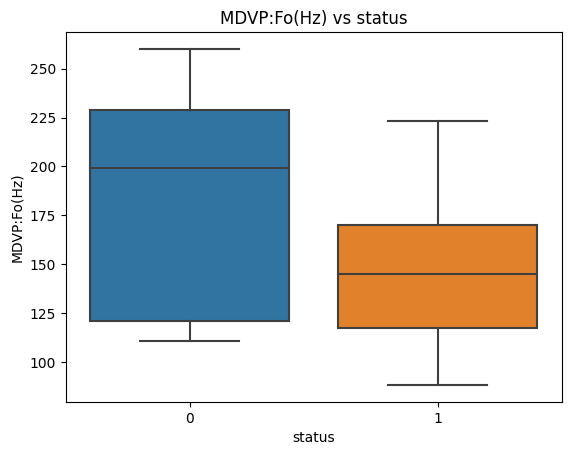

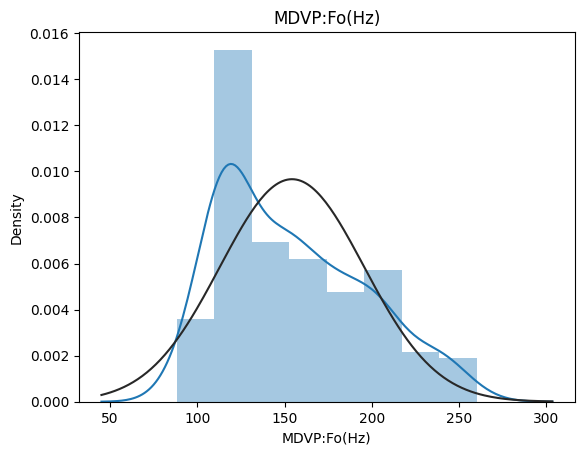

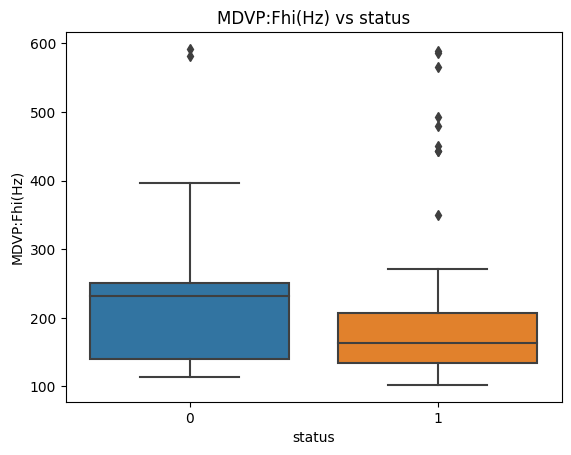

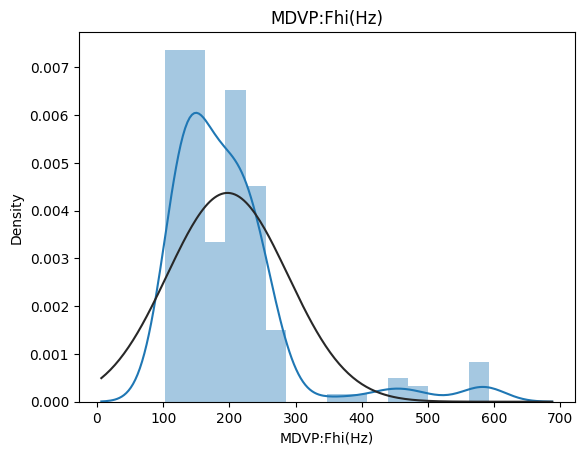

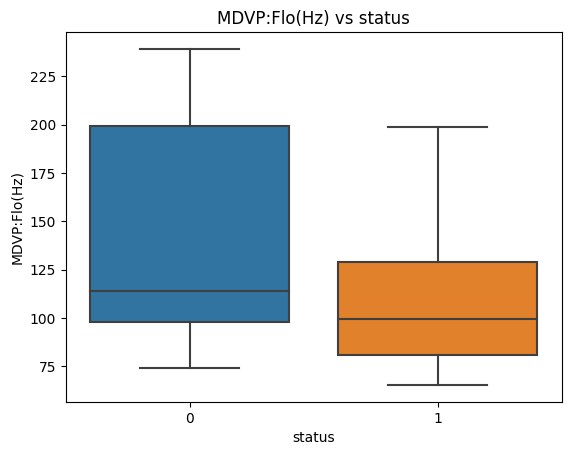

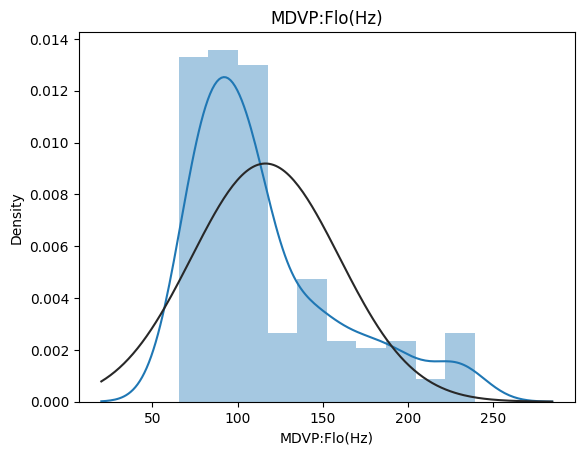

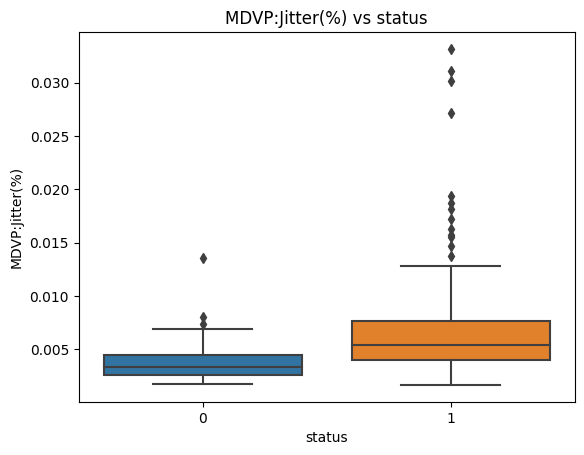

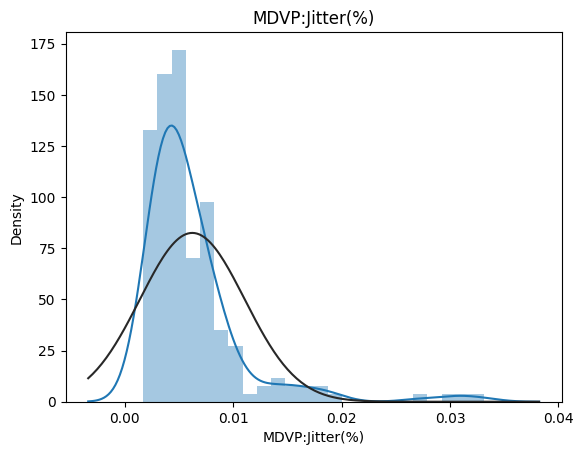

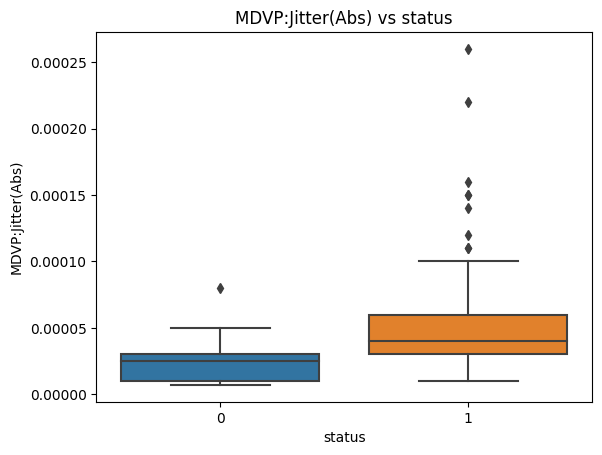

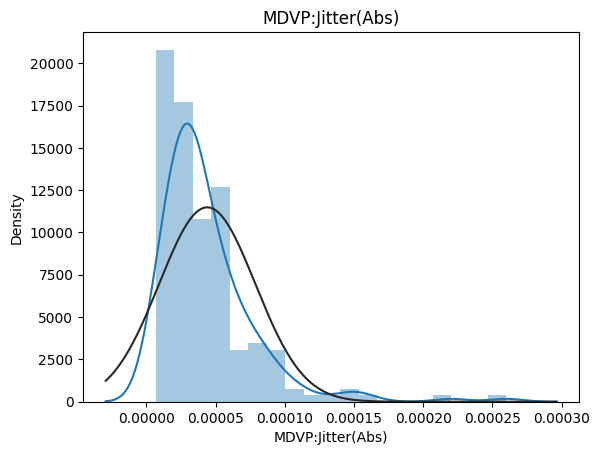

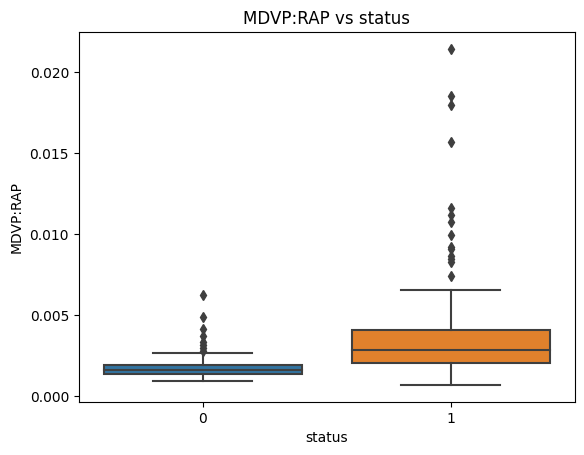

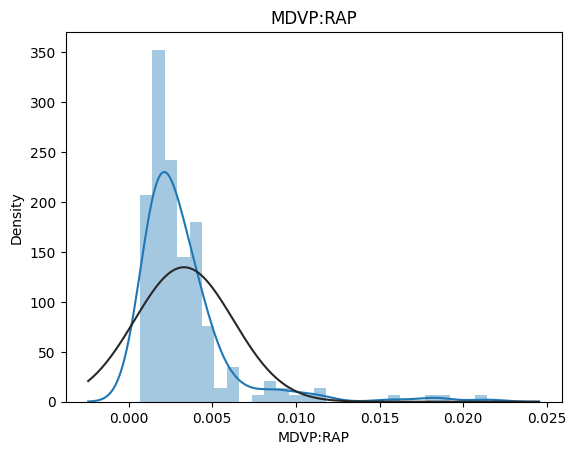

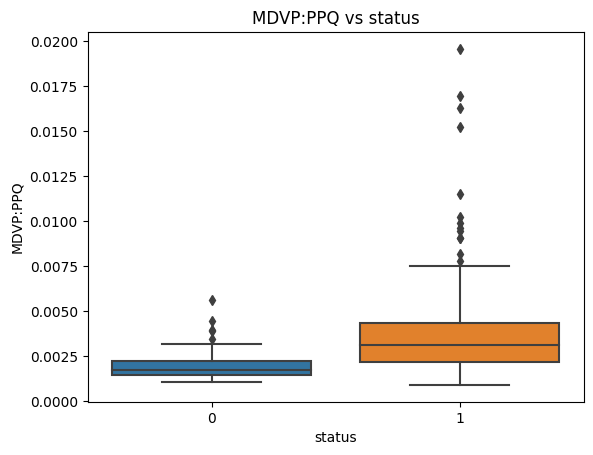

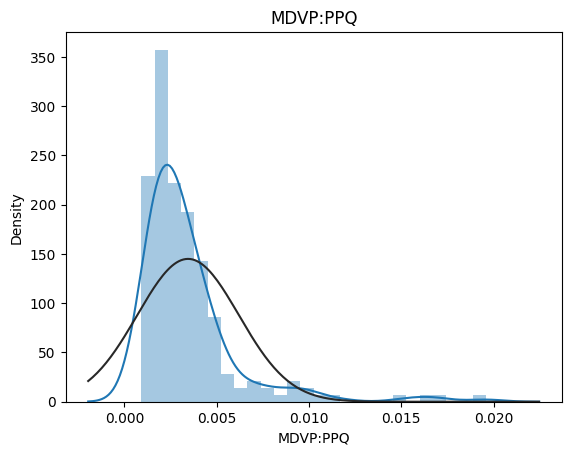

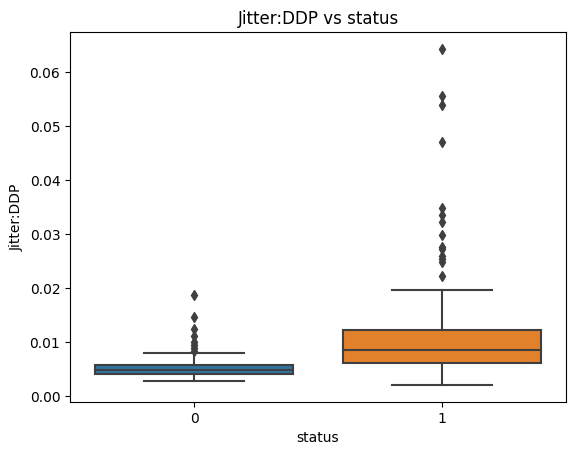

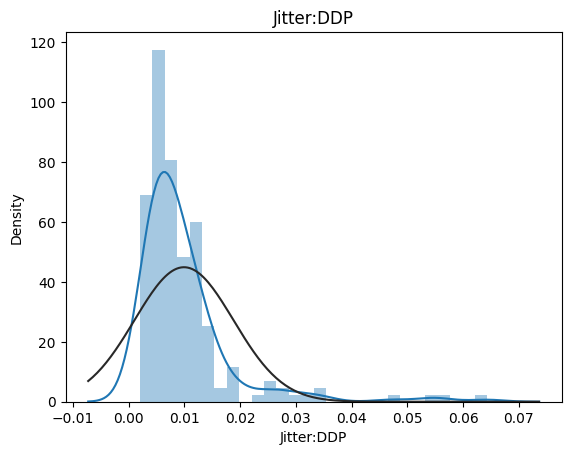

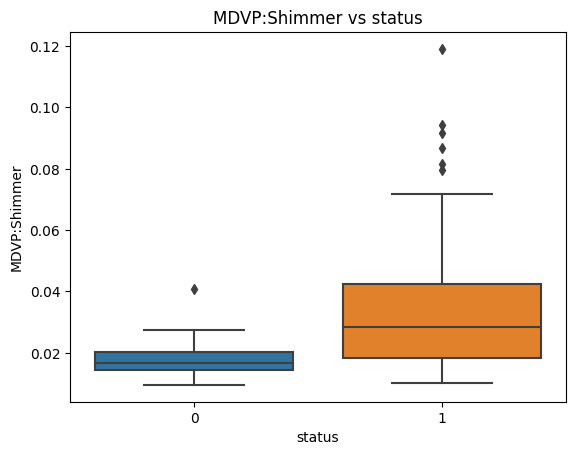

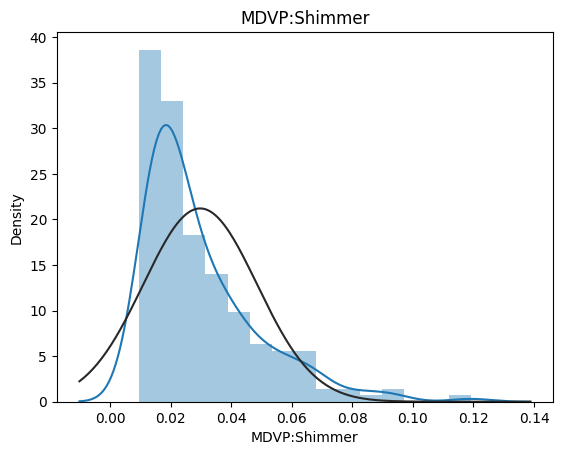

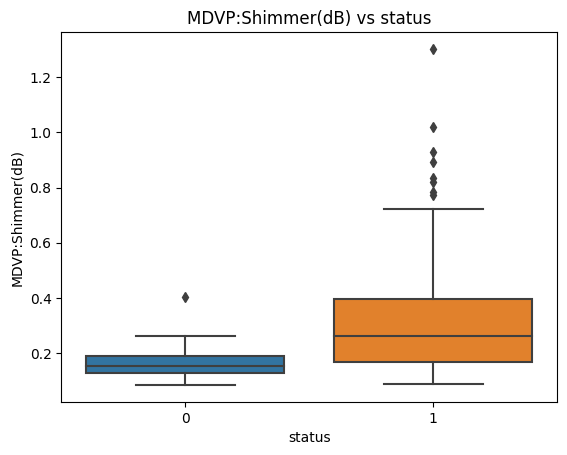

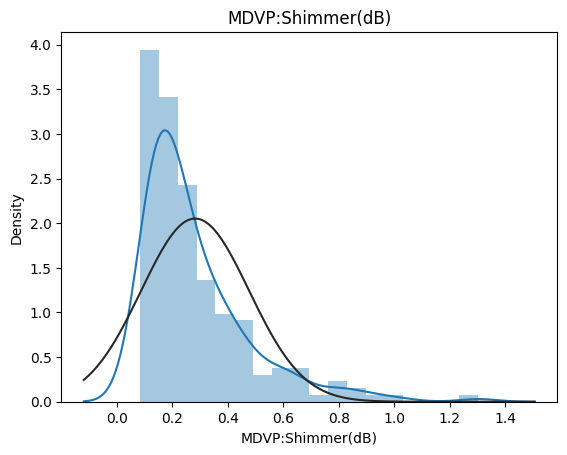

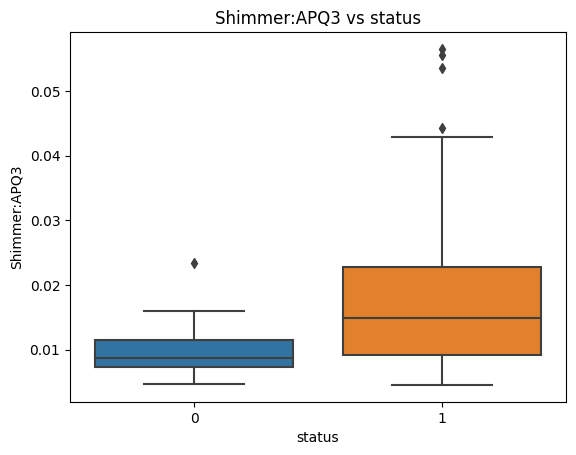

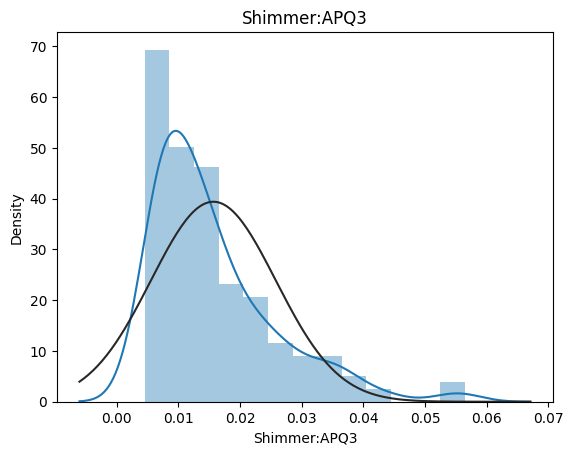

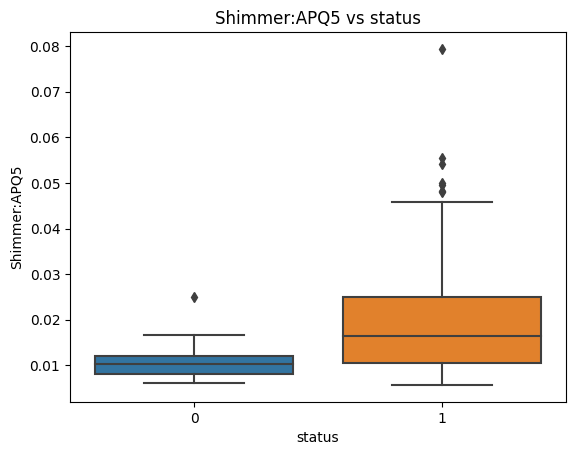

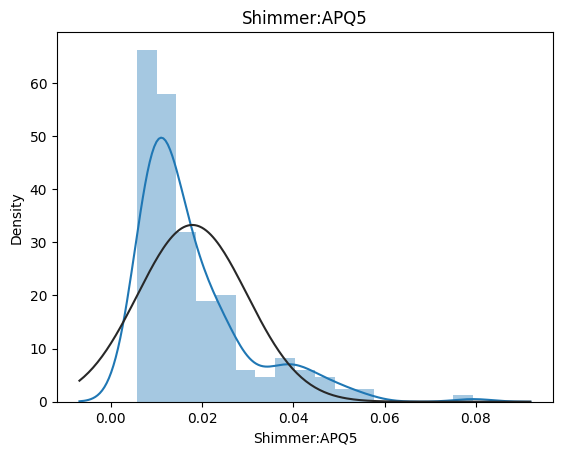

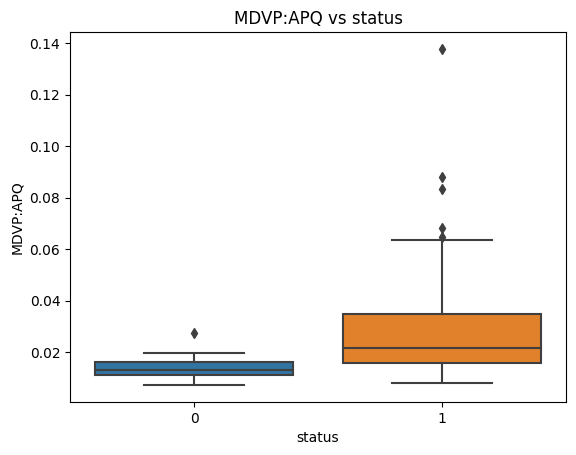

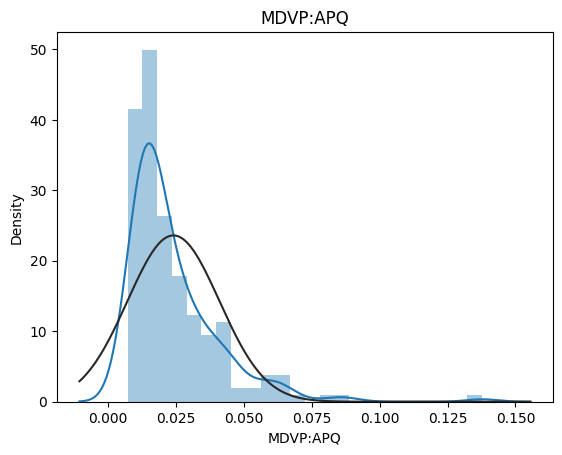

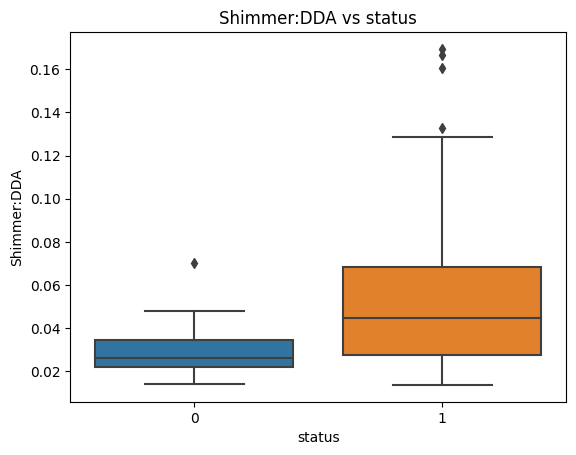

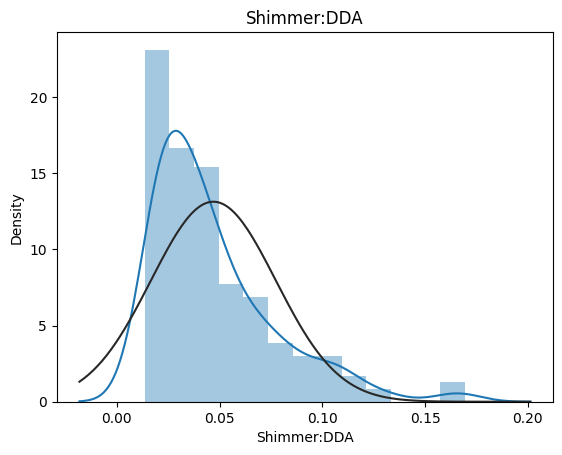

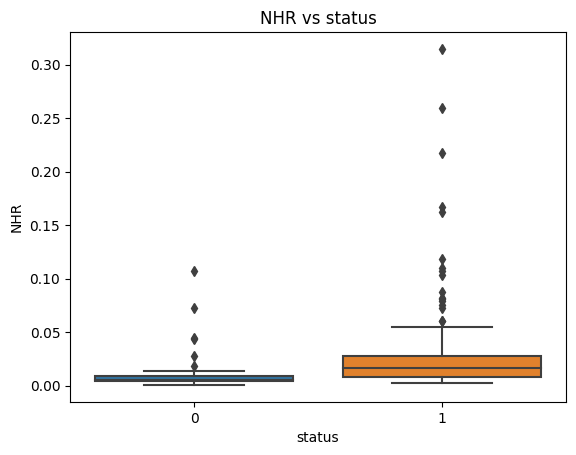

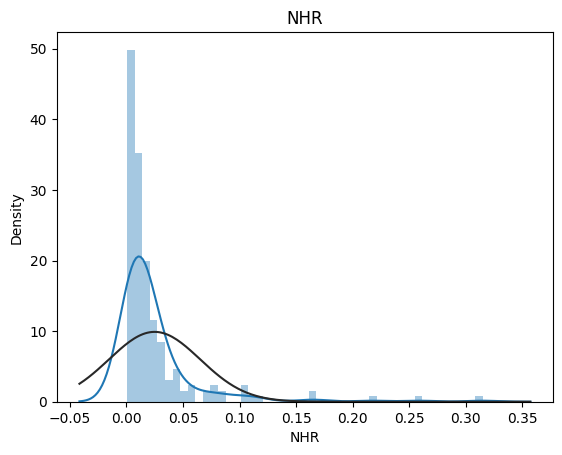

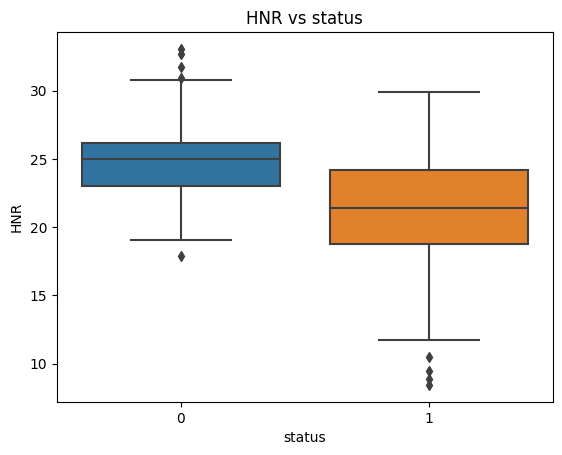

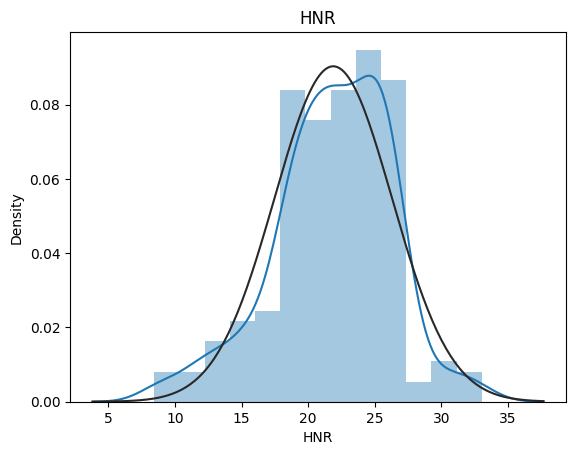

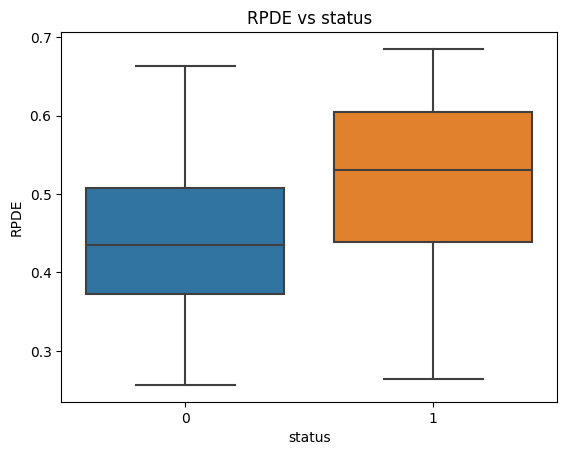

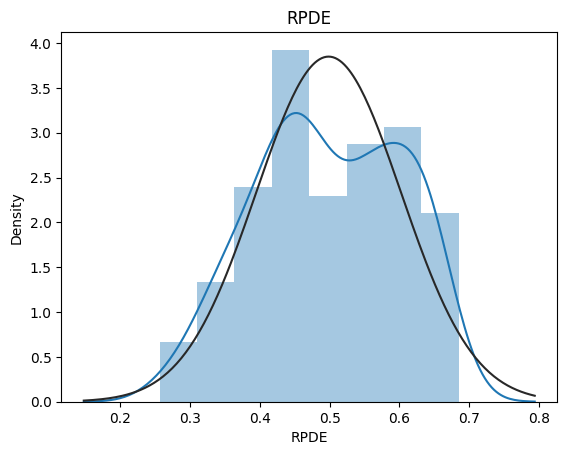

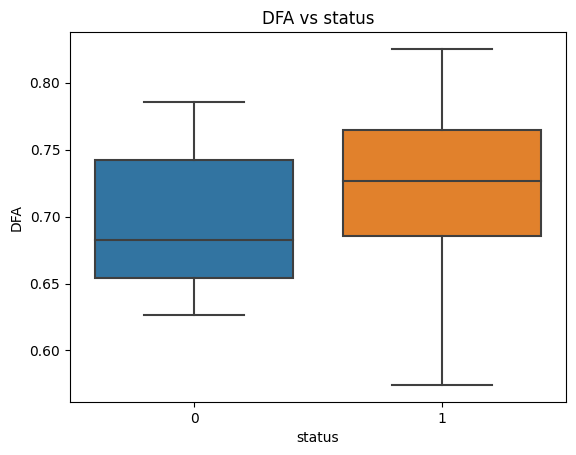

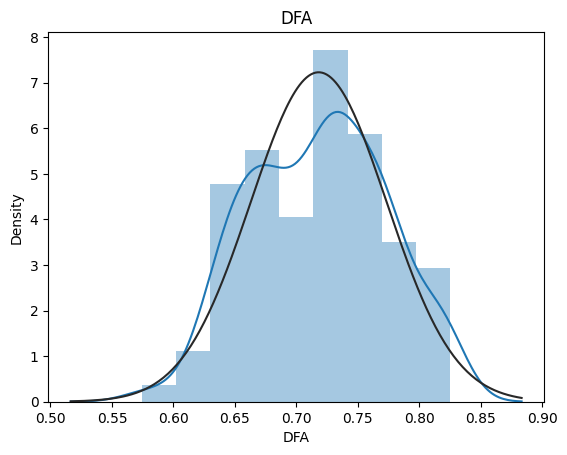

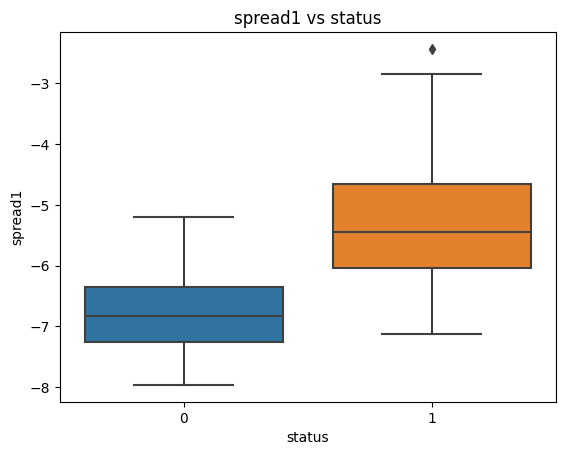

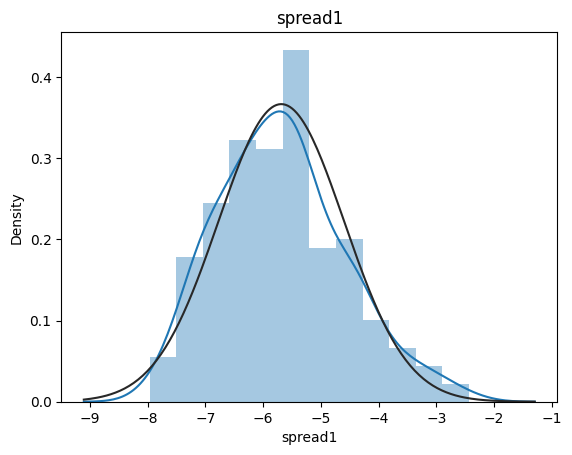

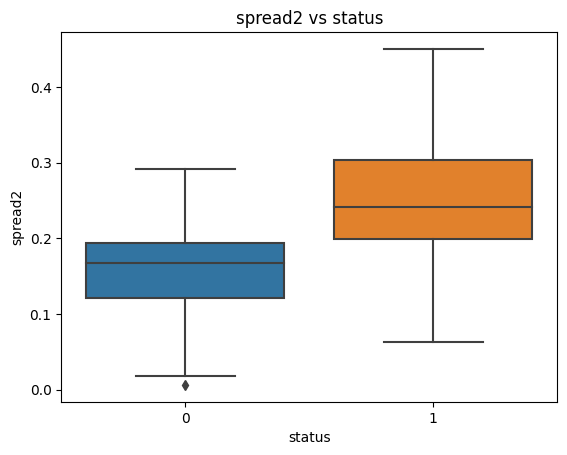

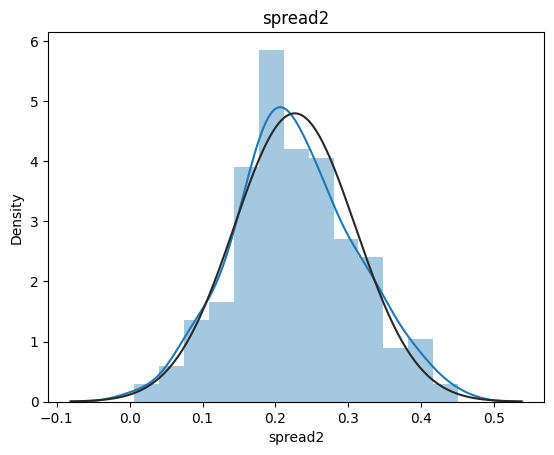

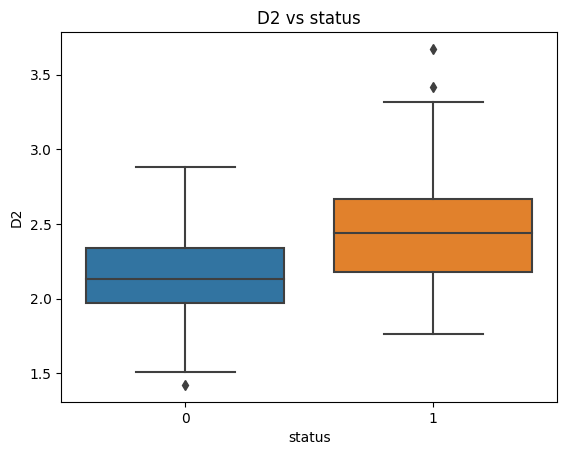

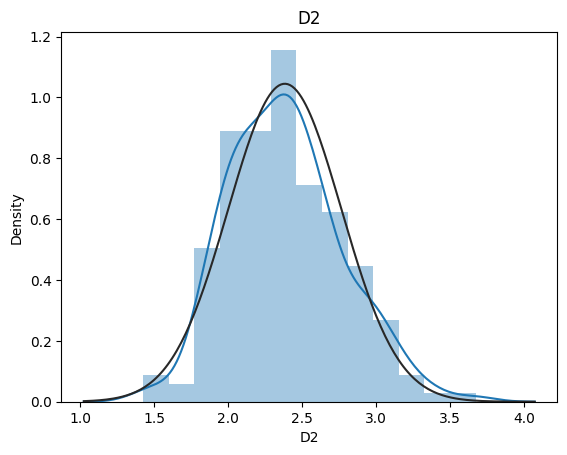

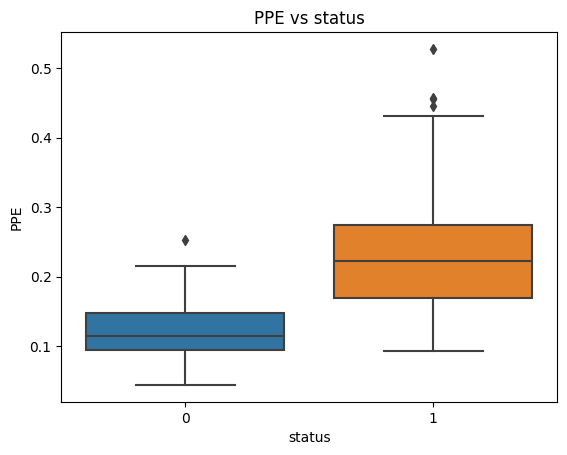

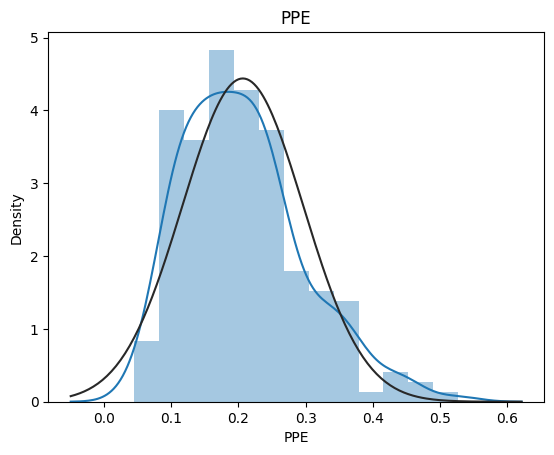

In [152]:
# ~ Quick initial comparison of features and target variables
# will remove weaker features laterX = df[df.loc[:, df.columns != 'Survived'].columns]
status_column = 'status'

for column in parkinsons_df.columns:
    if column != status_column:  # Skip the 'status' column itself
        plt.figure()  # Create a new figure for each plot
        sns.boxplot(x=status_column, y=column, data=parkinsons_df)
        plt.title(f'{column} vs {status_column}')
        plt.xlabel(status_column)
        plt.ylabel(column)
        plt.figure()
        sns.distplot(parkinsons_df[column],fit=norm)
        plt.title(f'{column}')
        
plt.show() 



In [153]:
X = parkinsons_df[parkinsons_df.loc[:, parkinsons_df.columns != 'status'].columns]
y = parkinsons_df['status']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state = 42)

logreg = LogisticRegression()
logreg.fit(X_train, y_train)

scores = cross_val_score(logreg, X_train, y_train, cv=10)
print('CV accuracy: %.3f +/- %.3f' % (np.mean(scores), np.std(scores)))

CV accuracy: 0.839 +/- 0.080


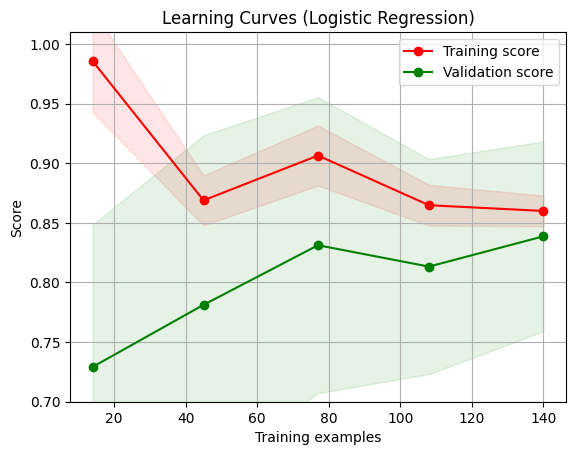

In [154]:
# Plot learning curve
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=1, train_sizes=np.linspace(.1, 1.0, 5)):
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Validation score")

    plt.legend(loc="best")
    return plt



# Plot learning curves
title = "Learning Curves (Logistic Regression)"
cv = 10
plot_learning_curve(logreg, title, X_train, y_train, ylim=(0.7, 1.01), cv=cv, n_jobs=1);

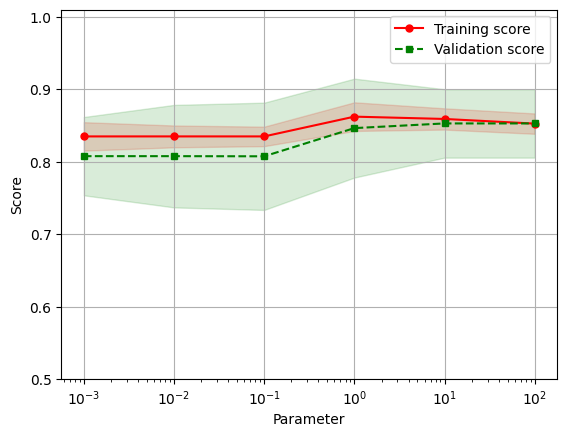

In [155]:
def plot_validation_curve(estimator, title, X, y, param_name, param_range, ylim=None, cv=None, n_jobs=1, train_sizes=np.linspace(.1, 1.0, 5)):
    train_scores, test_scores = validation_curve(estimator, X, y, param_name=param_name, param_range=param_range, cv=cv)
    train_mean = np.mean(train_scores, axis=1)
    train_std = np.std(train_scores, axis=1)
    test_mean = np.mean(test_scores, axis=1)
    test_std = np.std(test_scores, axis=1)
    plt.plot(param_range, train_mean, color='r', marker='o', markersize=5, label='Training score')
    plt.fill_between(param_range, train_mean + train_std, train_mean - train_std, alpha=0.15, color='r')
    plt.plot(param_range, test_mean, color='g', linestyle='--', marker='s', markersize=5, label='Validation score')
    plt.fill_between(param_range, test_mean + test_std, test_mean - test_std, alpha=0.15, color='g')
    plt.grid() 
    plt.xscale('log')
    plt.legend(loc='best') 
    plt.xlabel('Parameter') 
    plt.ylabel('Score') 
    plt.ylim(ylim)


# Plot validation curve
title = 'Validation Curve (Logistic Regression)'
param_name = 'C'
param_range = [0.001, 0.01, 0.1, 1.0, 10.0, 100.0] 
cv = 10

plot_validation_curve(estimator=logreg, title=title, X=X_train, y=y_train, param_name=param_name,
                      ylim=(0.5, 1.01), param_range=param_range);

In [156]:
X = parkinsons_df[parkinsons_df.loc[:, parkinsons_df.columns != 'status'].columns]
y = parkinsons_df['status']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=0)

In [157]:
X_train_transformed = X_train.copy()
for columns in  X_train_transformed:
    X_train_transformed[column] = boxcox(X_train_transformed[column] + 1)[0]


X_test_transformed = X_test.copy()
for columns in X_test_transformed:
    X_test_transformed[column] = boxcox(X_test_transformed[column] + 1)[0]

In [158]:
# ~ Scale the Data
scaler = MinMaxScaler()
X_train_transformed_scaled = scaler.fit_transform(X_train_transformed)
X_test_transformed_scaled = scaler.transform(X_test_transformed)

In [159]:
# ~ Add Polynomial Features
poly = PolynomialFeatures(degree=2).fit(X_train_transformed)
X_train_poly = poly.transform(X_train_transformed_scaled)
X_test_poly = poly.transform(X_test_transformed_scaled)

In [160]:
## Get score using original model
logreg = LogisticRegression(C=1)
logreg.fit(X_train, y_train)
scores = cross_val_score(logreg, X_train, y_train, cv=10)
print('CV accuracy (original): %.3f +/- %.3f' % (np.mean(scores), np.std(scores)))
highest_score = np.mean(scores)

## Get score using models with feature selection
for i in range(1, X_train_poly.shape[1]+1, 1):
    # Select i features
    select = SelectKBest(score_func=chi2, k=i)
    select.fit(X_train_poly, y_train)
    X_train_poly_selected = select.transform(X_train_poly)

    # Model with i features selected
    logreg.fit(X_train_poly_selected, y_train)
    scores = cross_val_score(logreg, X_train_poly_selected, y_train, cv=10)
    print('CV accuracy (number of features = %i): %.3f +/- %.3f' % (i, 
                                                                     np.mean(scores), 
                                                                     np.std(scores)))
    
    # Save results if best score
    if np.mean(scores) > highest_score:
        highest_score = np.mean(scores)
        std = np.std(scores)
        k_features_highest_score = i
    elif np.mean(scores) == highest_score:
        if np.std(scores) < std:
            highest_score = np.mean(scores)
            std = np.std(scores)
            k_features_highest_score = i
        
# Print the number of features
print('Number of features when highest score: %i' % k_features_highest_score)


CV accuracy (original): 0.852 +/- 0.032
CV accuracy (number of features = 1): 0.795 +/- 0.040
CV accuracy (number of features = 2): 0.795 +/- 0.040
CV accuracy (number of features = 3): 0.801 +/- 0.035
CV accuracy (number of features = 4): 0.840 +/- 0.066
CV accuracy (number of features = 5): 0.846 +/- 0.066
CV accuracy (number of features = 6): 0.847 +/- 0.064
CV accuracy (number of features = 7): 0.847 +/- 0.064
CV accuracy (number of features = 8): 0.847 +/- 0.064
CV accuracy (number of features = 9): 0.847 +/- 0.064
CV accuracy (number of features = 10): 0.840 +/- 0.058
CV accuracy (number of features = 11): 0.840 +/- 0.058
CV accuracy (number of features = 12): 0.834 +/- 0.064
CV accuracy (number of features = 13): 0.834 +/- 0.050
CV accuracy (number of features = 14): 0.834 +/- 0.050
CV accuracy (number of features = 15): 0.834 +/- 0.050
CV accuracy (number of features = 16): 0.828 +/- 0.056
CV accuracy (number of features = 17): 0.828 +/- 0.056
CV accuracy (number of features = 

In [161]:
# Select features
select = SelectKBest(score_func=chi2, k=k_features_highest_score)
select.fit(X_train_poly, y_train)
X_train_poly_selected = select.transform(X_train_poly)

In [162]:
# Fit model
logreg = LogisticRegression(C=1)
logreg.fit(X_train_poly_selected, y_train)

LogisticRegression(C=1)

In [163]:
# Model performance
scores = cross_val_score(logreg, X_train_poly_selected, y_train, cv=10)
print('CV accuracy: %.3f +/- %.3f' % (np.mean(scores), np.std(scores)))

CV accuracy: 0.859 +/- 0.049


<module 'matplotlib.pyplot' from 'c:\\Python310\\lib\\site-packages\\matplotlib\\pyplot.py'>

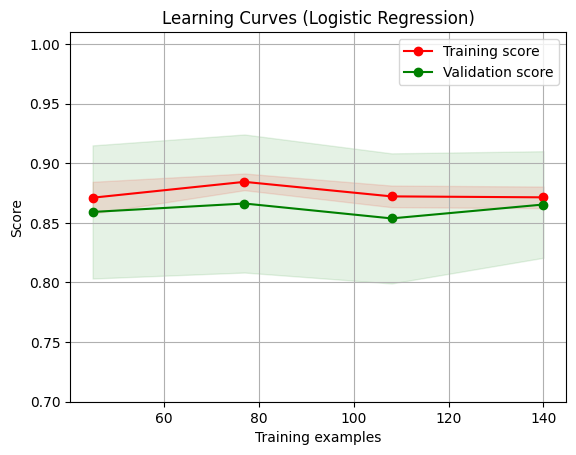

In [164]:
# Plot learning curves
title = "Learning Curves (Logistic Regression)"
cv = 10
plot_learning_curve(logreg, title, X_train_poly_selected, 
                    y_train, ylim=(0.7, 1.01), cv=cv, n_jobs=1)

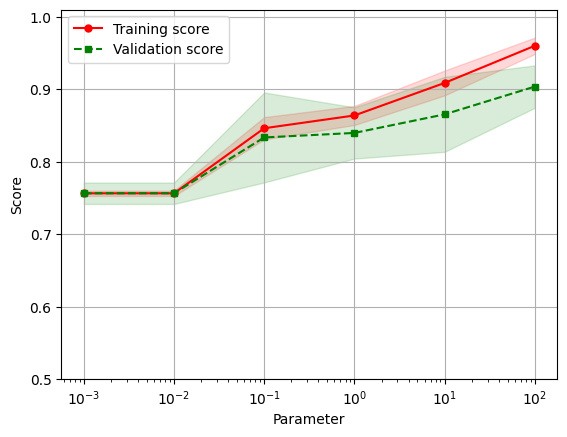

In [165]:
# Plot validation curve
title = 'Validation Curve (Logistic Regression)'
param_name = 'C'
param_range = [0.001, 0.01, 0.1, 1.0, 10.0, 100.0] 
cv = 10
plot_validation_curve(estimator=logreg, title=title, X=X_train_poly_selected, y=y_train, 
                      param_name=param_name, ylim=(0.5, 1.01), param_range=param_range);

In [ ]:
# ~ T 